Berlin Max Wind Speed: timestamp     2024-12-16 06:00:00
u10m                     8.490677
v10m                     0.983871
lat                          52.5
lon                          13.5
wind_speed               8.547491
year_month                2024-12
season                     Winter
Name: 1037, dtype: object
Munich Max Wind Speed: timestamp     2024-12-06 18:00:00
u10m                     9.015213
v10m                      0.84697
lat                         48.25
lon                          11.5
wind_speed               9.054912
year_month                2024-12
season                     Winter
Name: 999, dtype: object


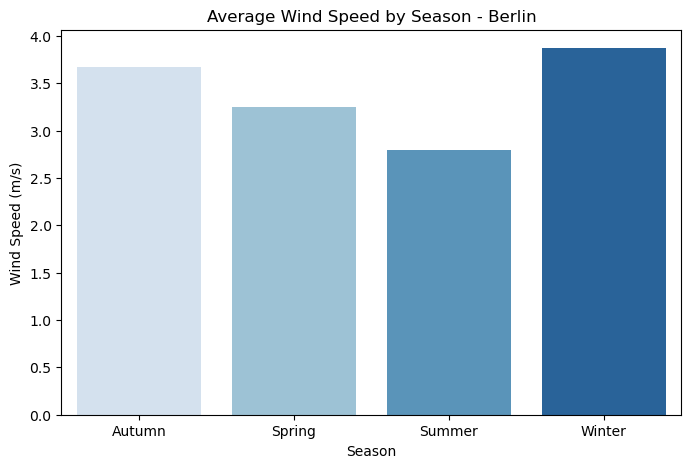

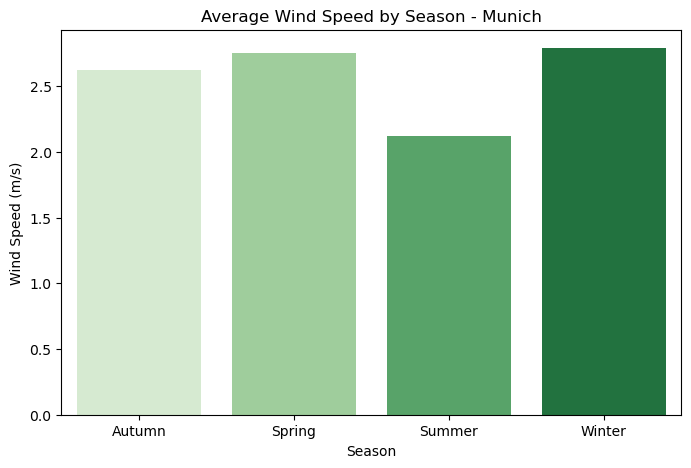

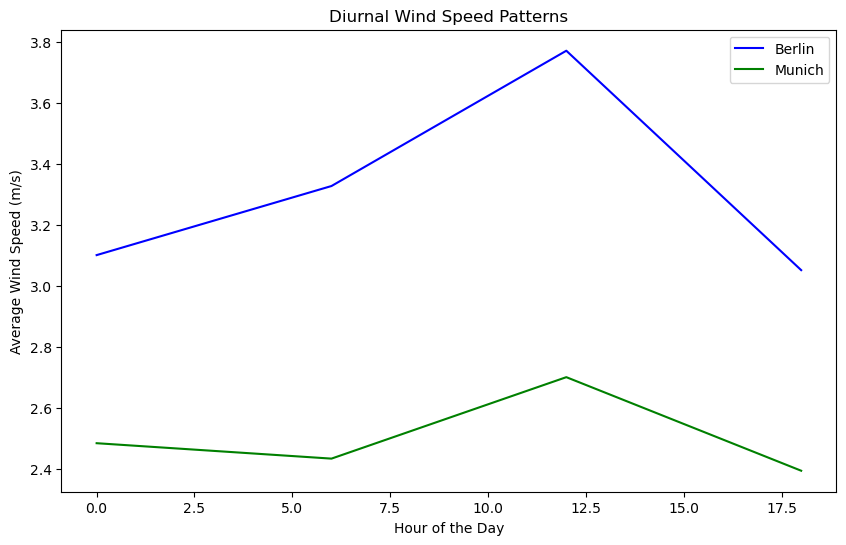

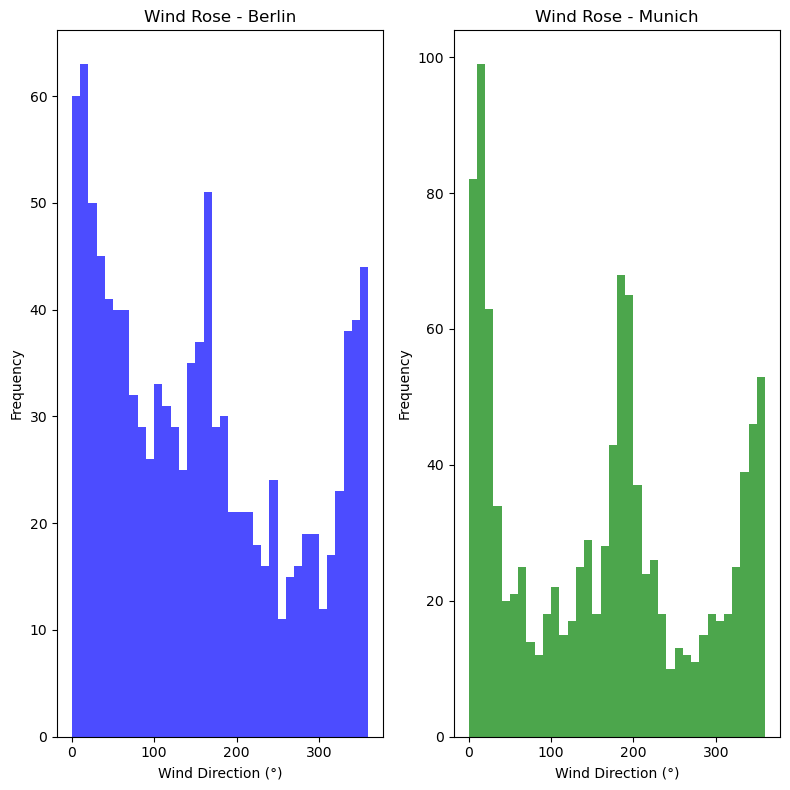

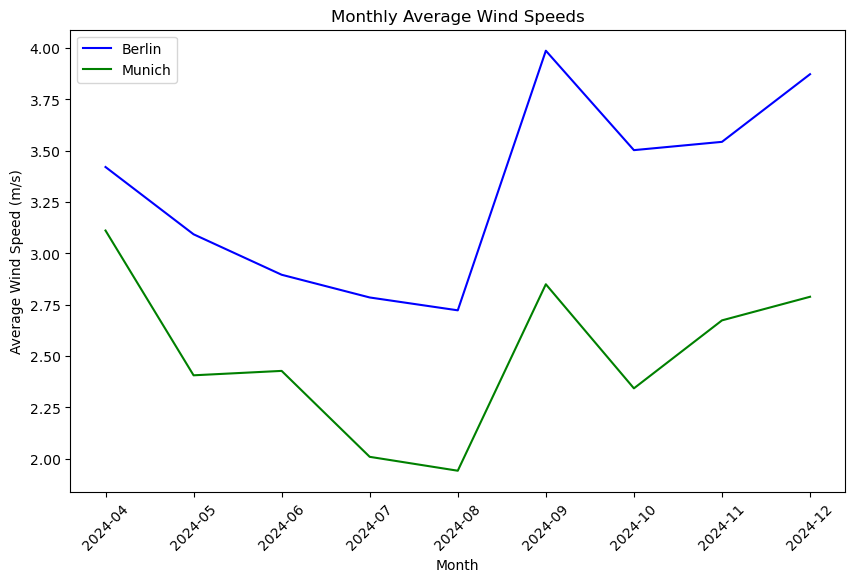

In [37]:
# import required libraries

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load Berlin data
berlin_df = pd.read_csv("../../datasets/berlin_era5_wind_20241231_20241231.csv")

# Load Munich data
munich_df = pd.read_csv("../../datasets/munich_era5_wind_20241231_20241231.csv")

# Convert timestamp column to datetime format (Be careful with the time objects part)
berlin_df["timestamp"] = pd.to_datetime(berlin_df["timestamp"])
munich_df["timestamp"] = pd.to_datetime(munich_df["timestamp"])

# berlin_df.isnull().sum() hence, no missing values in any column

# Function to calculate wind speed
def calculate_wind_speed(df):
    df["wind_speed"] = np.sqrt(df["u10m"]**2 + df["v10m"]**2)

# Apply function to both datasets
calculate_wind_speed(berlin_df)
calculate_wind_speed(munich_df)


# Extract year and month for grouping
berlin_df["year_month"] = berlin_df["timestamp"].dt.to_period("M")
munich_df["year_month"] = munich_df["timestamp"].dt.to_period("M")

# Compute monthly average wind speed
berlin_monthly_avg = berlin_df.groupby("year_month")["wind_speed"].mean()
munich_monthly_avg = munich_df.groupby("year_month")["wind_speed"].mean()


# Season dictionary for required mapping
seasons = {
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn",
    12: "Winter", 1: "Winter", 2: "Winter"
}

# Create the Season column
berlin_df["season"] = berlin_df["timestamp"].dt.month.map(seasons)
munich_df["season"] = munich_df["timestamp"].dt.month.map(seasons)

# Compute seasonal average wind speeds
berlin_seasonal_avg = berlin_df.groupby("season")["wind_speed"].mean()
munich_seasonal_avg = munich_df.groupby("season")["wind_speed"].mean()


#STATISTICAL ANALYSIS


# Identify the highest wind speed in Berlin and Munich
berlin_max_wind = berlin_df.loc[berlin_df['wind_speed'].idxmax()]
munich_max_wind = munich_df.loc[munich_df['wind_speed'].idxmax()]


print("Berlin Max Wind Speed:", berlin_max_wind)
print("Munich Max Wind Speed:", munich_max_wind)

# Compares almost about-TRUE with 2024–25 European windstorm season in Wikipedia



# Extract hour from timestamp
berlin_df['hour'] = berlin_df['timestamp'].dt.hour
munich_df['hour'] = munich_df['timestamp'].dt.hour

# Calculate average wind speed for each hour of the day
berlin_diurnal = berlin_df.groupby('hour')['wind_speed'].mean()
munich_diurnal = munich_df.groupby('hour')['wind_speed'].mean()


# ------- -------- ------- ------- ------- -VISUALIZATION----- -------- ------- ------- ------- -

# Create a bar plot for Berlin's seasonal wind speeds 
plt.figure(figsize=(8, 5))
sns.barplot(x=berlin_seasonal_avg.index, y=berlin_seasonal_avg.values, hue=berlin_seasonal_avg.index, palette="Blues", legend=False)
plt.title("Average Wind Speed by Season - Berlin")
plt.xlabel("Season")
plt.ylabel("Wind Speed (m/s)")
plt.show()

# Create a bar plot for Munich's seasonal wind speeds 
plt.figure(figsize=(8, 5))
sns.barplot(x=munich_seasonal_avg.index, y=munich_seasonal_avg.values, hue=munich_seasonal_avg.index, palette="Greens", legend=False)
plt.title("Average Wind Speed by Season - Munich")
plt.xlabel("Season")
plt.ylabel("Wind Speed (m/s)")
plt.show()


# Plot diurnal wind speed patterns
plt.figure(figsize=(10, 6))
plt.plot(berlin_diurnal, label="Berlin", color='blue')
plt.plot(munich_diurnal, label="Munich", color='green')
plt.title("Diurnal Wind Speed Patterns")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Wind Speed (m/s)")
plt.legend()
plt.show()


# Calculate wind direction (in degrees)
berlin_df['wind_direction'] = np.arctan2(berlin_df['v10m'], berlin_df['u10m']) * 180 / np.pi
munich_df['wind_direction'] = np.arctan2(munich_df['v10m'], munich_df['u10m']) * 180 / np.pi

# Normalize to 0-360 degrees range
berlin_df['wind_direction'] = (berlin_df['wind_direction'] + 360) % 360
munich_df['wind_direction'] = (munich_df['wind_direction'] + 360) % 360


# Wind rose diagrams

# Wind rose plot (Berlin)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.hist(berlin_df['wind_direction'], bins=36, range=(0, 360), color='blue', alpha=0.7)
plt.title("Wind Rose - Berlin")
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")

# Wind rose plot (Munich)
plt.subplot(1, 2, 2)
plt.hist(munich_df['wind_direction'], bins=36, range=(0, 360), color='green', alpha=0.7)
plt.title("Wind Rose - Munich")
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Monthly avg. wind speed

plt.figure(figsize=(10, 6))
plt.plot(berlin_monthly_avg.index.astype(str), berlin_monthly_avg.values, label='Berlin', color='blue')
plt.plot(munich_monthly_avg.index.astype(str), munich_monthly_avg.values, label='Munich', color='green')
plt.title('Monthly Average Wind Speeds')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ERROR HANDLING PART:

def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

# END
